In [1]:
import pandas as pd
import re
import string
import collections


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer

import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('train_amazon_1_lakh.csv')
df_test = pd.read_csv('test_amazon_10_thous.csv')

In [4]:
df_train

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
100014,1,dont buy this.,i wish i could give AFI 0 stars. all they make...
100015,1,Kiddie-Core to the max,(...) AFI comes off like a terrible C-grade mi...
100016,2,*bawls bc she can't find her AoD CD*,"Wonderful, wonderful. *beams* Beautiful album,..."
100017,2,AWESOME!,This CD is AWESOME! Some people say this is te...


In [5]:
df_test

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
...,...,...,...
9996,2,Love it Love it Love it,"My daughter loves this, she is six months old ..."
9997,1,Faulty leg causing distress for my baby,I purchased this item for my 6 month old baby ...
9998,2,Fantastic Entertainer,My daughter started enjoying this around 4-1/2...
9999,1,You can do better,I am a first time mom and loved the baby einst...


In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100016 entries, 0 to 100018
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   label          100016 non-null  int64 
 1   text           100016 non-null  object
 2   review_length  100016 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.1+ MB


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100019 entries, 0 to 100018
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                      Non-Null Count   Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                      --------------   ----- 
 0   2                                  

In [8]:
df_train.columns = ['label', 'title', 'text']
df_train.head()

,label,title,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [9]:
df_test.columns = ['label', 'title', 'text']
df_test.head()

,label,title,text
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


In [10]:
df_train.isna().sum()

label    0
title    3
text     0
dtype: int64

In [11]:
df_test.isna().sum()

label    0
title    1
text     0
dtype: int64

In [12]:
df_test.dropna(inplace=True)

In [13]:
df_train.dropna(inplace=True)

In [14]:
print(df_train['label'].value_counts())
print(df_test['label'].value_counts())

2    51279
1    48737
Name: label, dtype: int64
2    5125
1    4875
Name: label, dtype: int64


In [15]:
def concat_columns(df, col1, col2, new_col):
    df[new_col] = df[col1].apply(str) + ' ' + df[col2].apply(str)
    df.drop(col2, axis = 1, inplace = True)
    return df
df_train = concat_columns(df_train, 'text', 'title', 'text')
df_test = concat_columns(df_test, 'text', 'title', 'text')

In [16]:
df_train['label'] = df_train['label'].map({1:0, 2:1})
df_test['label'] = df_test['label'].map({1:0, 2:1})

In [17]:
df_train.head()

,label,text
0,1,I'm reading a lot of reviews saying that this ...
1,1,This soundtrack is my favorite music of all ti...
2,1,I truly like this soundtrack and I enjoy video...
3,1,"If you've played the game, you know how divine..."
4,1,I am quite sure any of you actually taking the...


In [18]:
#Function to remove unwanted characters
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-zÀ-ú ]+', '', text)
    # Analyzing the most used words below, i chose to exclude these because there are too many and are unnecessary
    text = re.sub('movi', '', text)
    # Convert to lower case
    text = text.lower()
    # remove scores
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Applying the function
df_train['text'] = df_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)

In [19]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER_PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER_PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
def remove_stopwords(texto):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(texto.lower())
    return " ".join([token for token in tokens if token not in stop_words])

# Applying the function
df_train['text'] = df_train['text'].apply(remove_stopwords)
df_test['text'] = df_test['text'].apply(remove_stopwords)

In [21]:
def normalize_text(text):
    stemmer = SnowballStemmer("english")
    normalized_text = []
    for word in text.split():
        stemmed_word = stemmer.stem(word)
        normalized_text.append(stemmed_word)
    return ' '.join(normalized_text)
    
# Applying the function
df_train['text'] = df_train['text'].apply(normalize_text)
df_test['text'] = df_test['text'].apply(normalize_text)

In [22]:
df_test['text']

0        despit fact play small portion game music hear...
1        bought charger jul work ok design nice conveni...
2        check maha energi websit powerex mhcf charger ...
3        review quit bit combo player hesit due unfavor...
4        also began incorrect disc problem ive read vcr...
                               ...                        
9996     daughter love six month old weve three week ti...
9997     purchas item month old babi love entertain kep...
9998     daughter start enjoy around month though littl...
9999     first time mom love babi einstein line great p...
10000    bought exersauc littl guy bare abl sit upright...
Name: text, Length: 10000, dtype: object

In [51]:
# wordcloud
from wordcloud import WordCloud

In [52]:
df_combined = pd.concat([df_train, df_test], ignore_index=True)


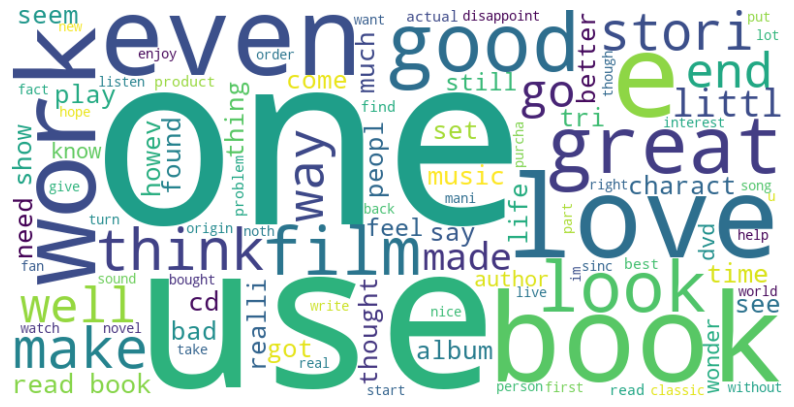

In [53]:
# Combine all the text into a single string
text = ' '.join(df_combined['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Text(0, 0.5, 'Frequency')

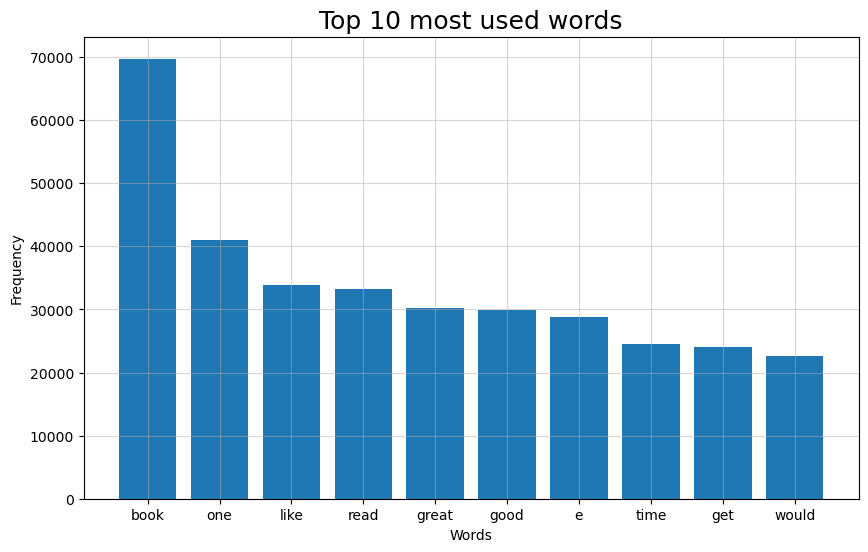

In [23]:
words = []
for text in df_train['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Figure Size
plt.figure(figsize = (10, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)

# Title and labels
plt.title('Top 10 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

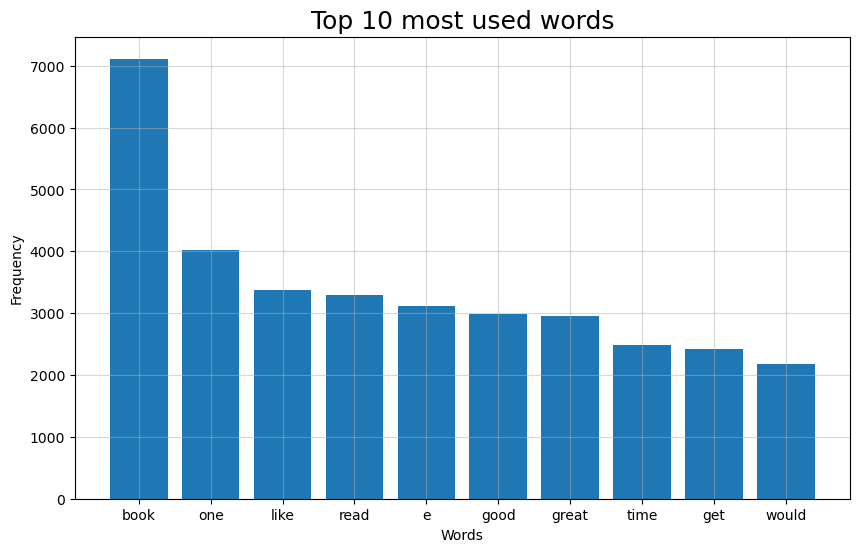

In [24]:
words = []
for text in df_test['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Figure Size
plt.figure(figsize = (10, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)
# Title and labels
plt.title('Top 10 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

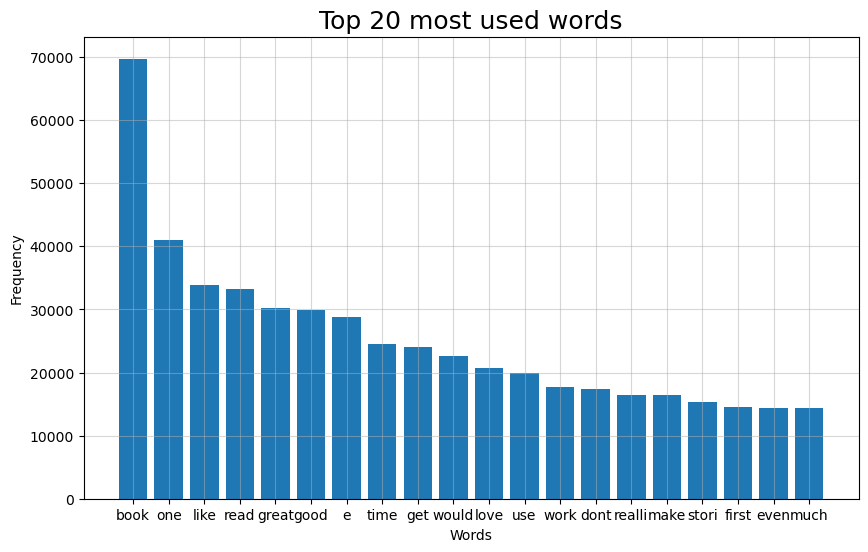

In [25]:
words = []
for text in df_train['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(20))

# Figure Size
plt.figure(figsize = (10, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)
# Title and labels
plt.title('Top 20 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

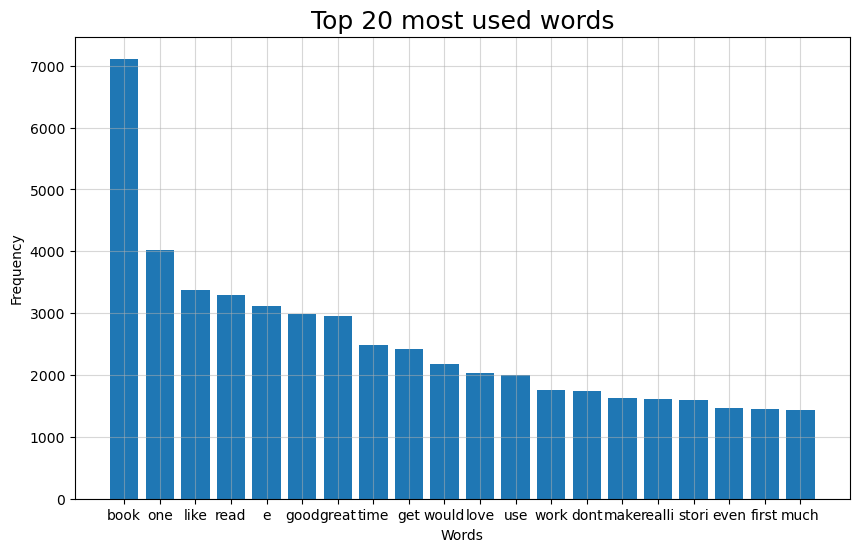

In [26]:
words = []
for text in df_test['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(20))

# Figure Size
plt.figure(figsize = (10, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)
# Title and labels
plt.title('Top 20 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

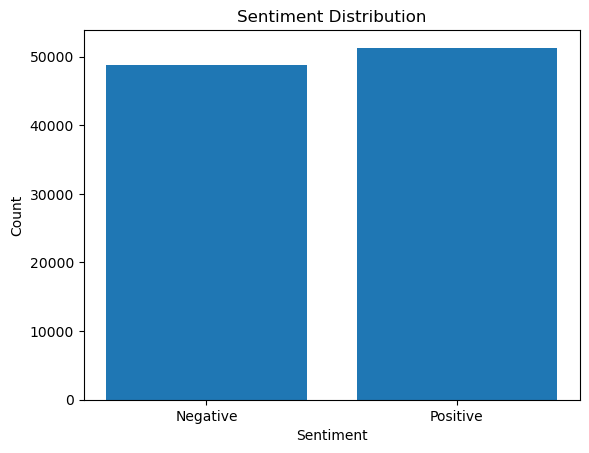

In [27]:
sentiment_counts = df_train['label'].value_counts()
# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
# Add labels to the bars
plt.xticks(sentiment_counts.index, ['Positive', 'Negative'])
plt.show()

In [39]:
df_train['review_length'] = df_train['text'].apply(lambda x: len(x.split()))


In [40]:
average_length = df_train['review_length'].mean()


In [33]:
print("Average Review Length:", average_length)


Average Review Length: 40.80988041913294


In [34]:
import pandas as pd

# Calculate the length of each review
df_train['review_length'] = df_train['text'].apply(lambda x: len(x.split()))

# Calculate the average length of reviews
average_length = df_train['review_length'].mean()

# Display the average length
print("Average Review Length:", average_length)


Average Review Length: 40.80988041913294


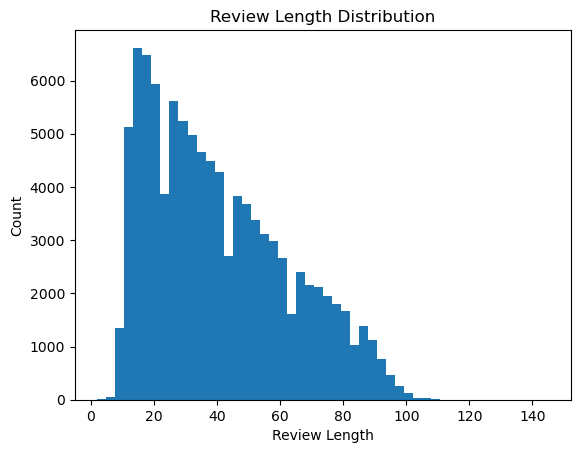

In [35]:
import matplotlib.pyplot as plt

# Plot the review length distribution
plt.hist(df_train['review_length'], bins=50)
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Review Length Distribution')
plt.show()


FNN

In [37]:
oov_tok='<OOV>'
trunc_type='post'
padding_type='post'

In [38]:
# Maximum number of words to be considered in the vocabulary
max_words = 10000 
# Maximum number of tokens in a sequence
max_len = 200 
# Tokenizer
tokenizer = Tokenizer(num_words = max_words,oov_token='<OOV>') 
# Snap tokenizer to text data
tokenizer.fit_on_texts(df_train['text']) 
# Converts texts into strings of numbers
sequences_train = tokenizer.texts_to_sequences(df_train['text']) 
sequences_val = tokenizer.texts_to_sequences(df_test['text']) 
# Mapping words to indexes
word_index = tokenizer.word_index 

In [41]:
# Sequence padding
data_train = pad_sequences(sequences_train, maxlen = max_len,padding = 'post',truncating=trunc_type)
data_val = pad_sequences(sequences_val, maxlen = max_len,padding = 'post')

In [42]:
# Create the model
model = tf.keras.Sequential()
model.add(Embedding(max_words, 16, input_length = max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation = 'sigmoid'))

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Checking summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,017
Trainable params: 160,017
Non-trainable params: 0
_________________________________________________________________


In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
# Fit model
history = model.fit(data_train, df_train['label'], epochs = 15, batch_size = 64, validation_data = (data_val, df_test['label']),callbacks=[EarlyStopping(monitor='val_accuracy',patience=4,restore_best_weights=True)])

Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5982 - accuracy: 0.7475 - val_loss: 0.4698 - val_accuracy: 0.8355
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3974 - accuracy: 0.8589 - val_loss: 0.3531 - val_accuracy: 0.8682
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3252 - accuracy: 0.8753 - val_loss: 0.3183 - val_accuracy: 0.8726
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2968 - accuracy: 0.8832 - val_loss: 0.3047 - val_accuracy: 0.8762
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2817 - accuracy: 0.8881 - val_loss: 0.2990 - val_accuracy: 0.8774
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2723 - accuracy: 0.8922 - val_loss: 0.2969 - val_accuracy: 0.8795
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2653 - accuracy: 0.8956 - val_loss: 0.2972 - val_accuracy:

In [46]:
loss, accuracy = model.evaluate(data_val, df_test['label'], verbose = 0)
print('Accuracy: %f' % (accuracy*100))
print("loss",loss)

Accuracy: 88.209999
loss 0.30417633056640625


Custom predictions

In [47]:
def predict_custom_text(input_text):
 input_text=clean_text(input_text)
 input_text=remove_stopwords(input_text)
 input_text=normalize_text(input_text)
 sequences=tokenizer.texts_to_sequences([input_text])
 padded=pad_sequences(sequences,maxlen=max_len,padding=padding_type,truncating=trunc_type)
 predictions=model.predict(padded)[0]
 sentiment='Positive' if predictions > 0.5 else 'Negative'
 return sentiment

In [48]:
predict_custom_text("21,Buyer beware,This is a self-published book, and if you want to know why--read a few paragraphs! Those 5 star reviews must have been written by Ms. Haddon's family and friends--or perhaps, by herself! I can't imagine anyone reading the whole thing--I spent an evening with the book and a friend and we were in hysterics reading bits and pieces of it to one another. It is most definitely bad enough to be entered into some kind of a worst book contest. I can't believe Amazon even sells this kind of thing. Maybe I can offer them my 8th grade term paper on ""To Kill a Mockingbird""--a book I am quite sure Ms. Haddon never heard of. Anyway, unless you are in.")

1/1 [==============================] - 0s 102ms/step


'Negative'

Exporting

In [49]:
import pickle

In [50]:
with open('sentiment_analysis.pickle', 'wb') as f:
    pickle.dump(model, f)
f.close()

with open('sentiment_analysis_tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f)
f.close()

Type Markdown and LaTeX:  𝛼2